In [1]:
lfs=require 'lfs'
if string.find(lfs.currentdir(), 'visualization') then
    lfs.chdir('../')
end

In [2]:
require 'gnuplot'
require 'utils.MnistManager'
require 'utils.grid'
require 'models.GmmVae'
require 'nnutils.init'
require 'optim'
require 'cunn'
require 'image'
Plot = require 'itorch.Plot'
cmd = {h_size = 400, z_size = 2}

In [3]:
N = 50
data = MnistManager(50):cuda()
saved = torch.load('save/GmmVae_z10_m1000.t7')
vae = saved.vae

# Image Reconstruction

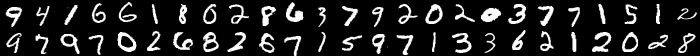

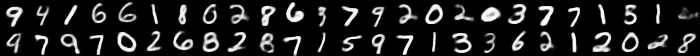

In [5]:
data:shuffle()
input = data:next()[1]
pmulv, mulv, recon = unpack(vae.model:forward(input))
-- original image
itorch.image(grid.stack(input:reshape(N, 28, 28), 2, 25))
-- reconstructed image
itorch.image(grid.stack(recon:reshape(N, 28, 28), 2, 25))

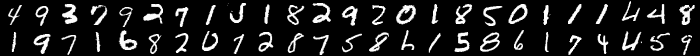

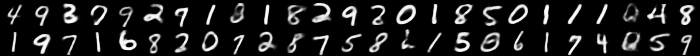

In [6]:
data:shuffleValid()
input = data:nextValid()[1]
pmulv, mulv, recon = unpack(vae.model:forward(input))
-- original image
itorch.image(grid.stack(input:reshape(N, 28, 28), 2, 25))
-- reconstructed image
itorch.image(grid.stack(recon:reshape(N, 28, 28), 2, 25))

# Encoding Distribution

In [15]:
data:shuffle(5000)
input = data:next()[1]
mask = input:clone():zero()
pmulv, mulv, recon = unpack(vae.model:forward({mask,input}))

In [17]:
gmmSampler = nn.GmmSampler():cuda()

In [18]:
code = gmmSampler:forward(mulv)
plt = Plot()
plt:circle(code[{{},1}], code[{{},2}], '#00F0F0')
plt:title("Distribution")
plt:draw()

In [20]:
code = sampler:forward(pmulv)
plt = Plot()
plt:circle(code[{{},1}], code[{{},2}], '#00F0F0')
plt:title("Distribution")
plt:draw()

# Image Generation

In [10]:
gmmSampler = nn.GmmSampler():cuda()

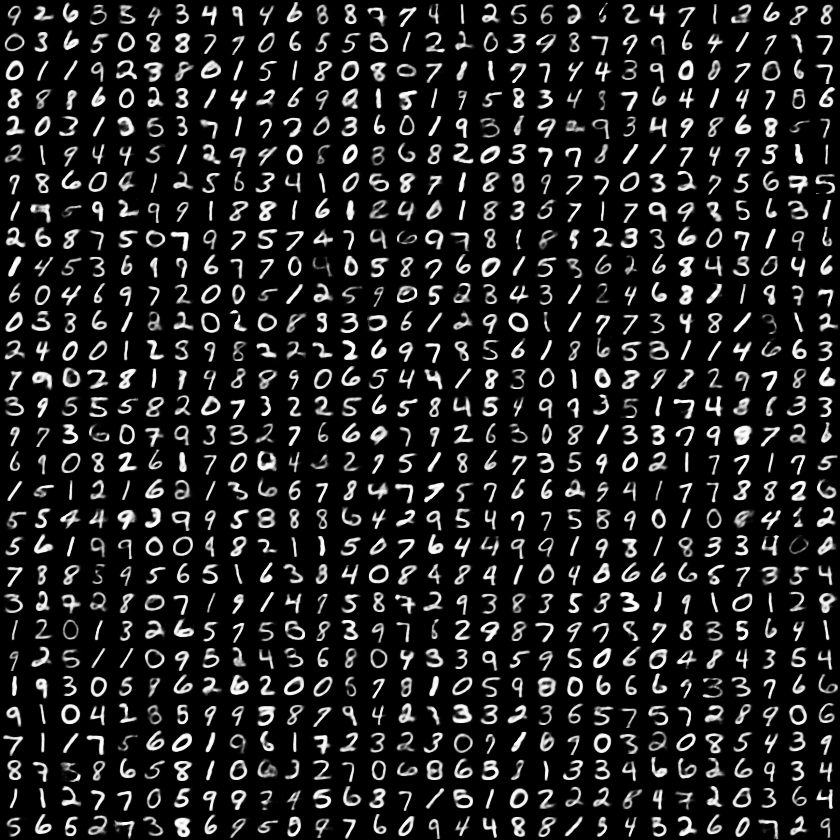

In [26]:
N = 900
data:shuffle(N)
input = data:next()[1]
pmulv, mulv, recon = unpack(vae.model:forward(input))
code = gmmSampler:forward(pmulv)
recon = vae.decoder:forward(code)
recon = recon:reshape(N, 28, 28)
images = grid.stack(recon, 30, 30)
itorch.image(images)

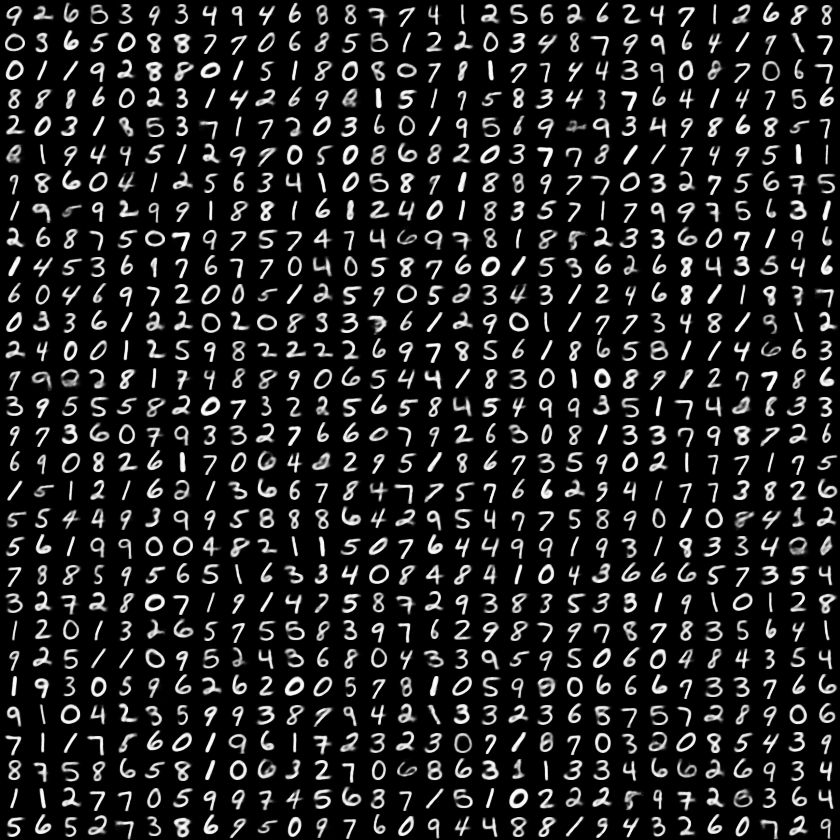

In [27]:
code = gmmSampler.mu
recon = vae.decoder:forward(code)
recon = recon:reshape(N, 28, 28)
images = grid.stack(recon, 30, 30)
itorch.image(images)

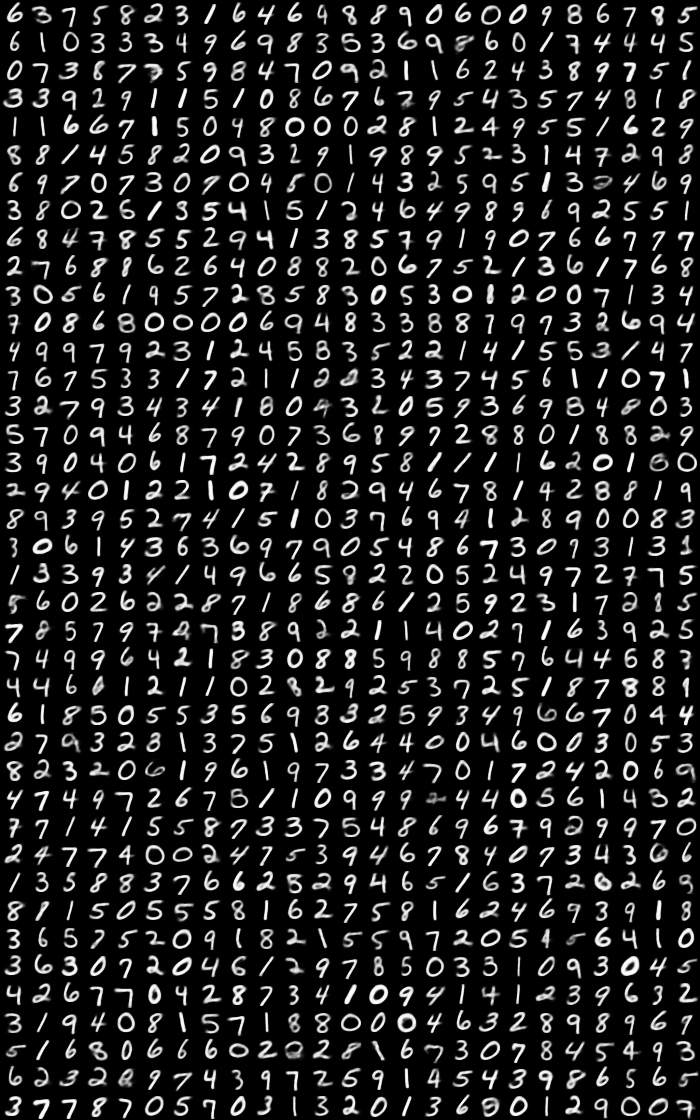

In [25]:
pmu, plv = unpack(pmulv:split(1000, 2))
recon = vae.decoder:forward(pmu[1])
recon = recon:reshape(1000, 28, 28)
images = grid.stack(recon, 40, 25)
itorch.image(images)

In [23]:
pmu, plv = unpack(pmulv:split(N/2, 2))
plt = Plot()
plt:histogram(pmu:double())
plt:title("hi")
plt:draw()